<a href="https://colab.research.google.com/github/Heba2424/DEPI_Projects/blob/main/noisy_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()



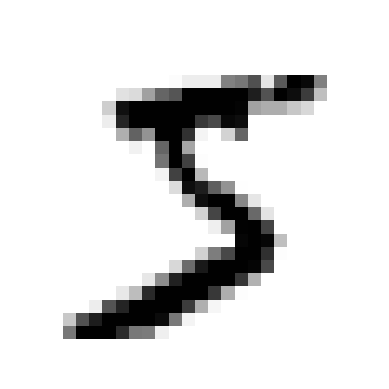

In [ ]:
# extra code

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
def add_gaussian_noise(images, mean=0.0, std=0.5):
    noisy_images = images + np.random.normal(mean, std, images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images


In [ ]:
# Normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Add Gaussian noise to the images
X_train_noisy = add_gaussian_noise(X_train)
X_test_noisy = add_gaussian_noise(X_test)

# Flatten the images for the fully connected neural network
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)
X_train_noisy_flat = X_train_noisy.reshape(-1, 28*28)
X_test_noisy_flat = X_test_noisy.reshape(-1, 28*28)

In [ ]:
X = X_train_noisy_flat
y = X_train_flat

In [ ]:
# Define the autoencoder model
input_img = Input(shape=(28*28,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
X.shape[1:]

(784,)

In [ ]:
# Train the autoencoder
autoencoder.fit(X, X_train_flat, epochs=30, batch_size=128, shuffle=True, validation_data=(X_test_noisy_flat, X_test_flat))

Epoch 1/30
469/469 [==============================] - 5s 6ms/step - loss: 0.2322 - val_loss: 0.1794
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1701 - val_loss: 0.1609
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1562 - val_loss: 0.1492
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1467 - val_loss: 0.1424
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1412 - val_loss: 0.1373
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1372 - val_loss: 0.1344
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1342 - val_loss: 0.1330
Epoch 8/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1318 - val_loss: 0.1307
Epoch 9/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1298 - val_loss: 0.1291
Epoch 10/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1284 - val_loss: 0.1283

313/313 [==============================] - 1s 2ms/step


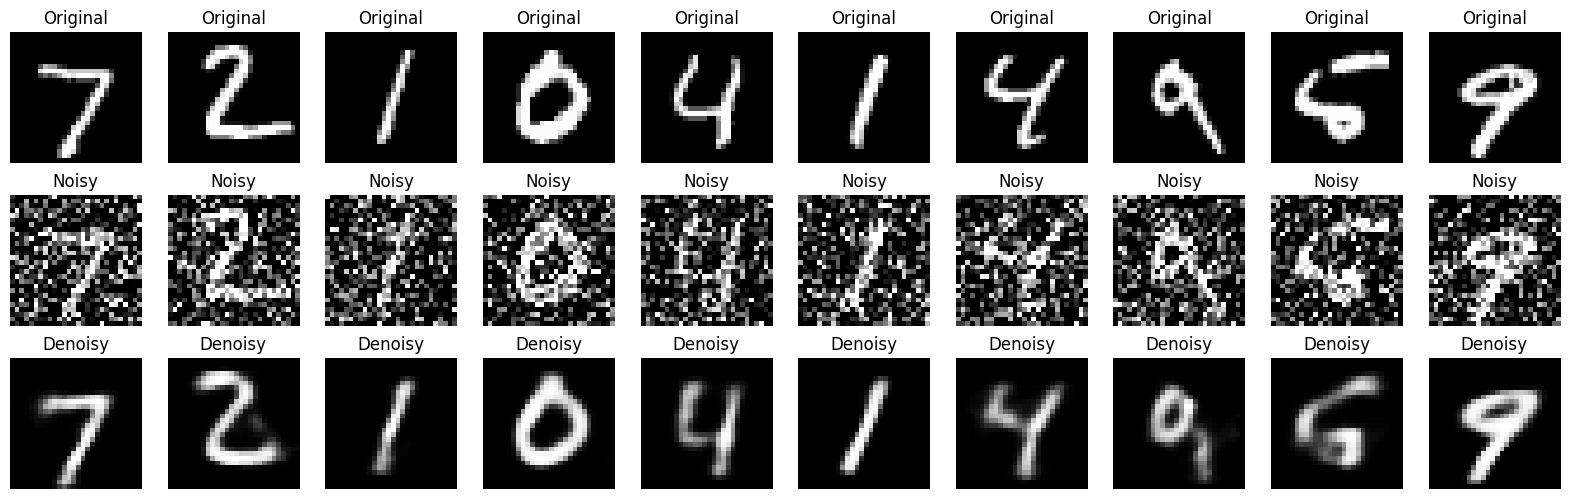

In [ ]:
# Predict on the test set
decoded_imgs = autoencoder.predict(X_test_noisy_flat)

# Display original, noisy, and reconstructed images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoisy")
    plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) between original and denoised images
mse = mean_squared_error(X_test_flat, X_test_noisy_flat)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.1157


In [ ]:
autoencoder.evaluate(X_test_flat, X_test_noisy_flat)

313/313 [==============================] - 1s 2ms/step - loss: 2.9254


2.9253807067871094